In [1]:
import pandas as pd

## Reading the data in pandas

In [2]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-18,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,13.42,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-19,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,19.24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-20,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.72,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Preparing the data


In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.663558
ACSH       0.663558
AWND       0.507081
DAPR       0.999539
FMTM       0.873921
FRGT       0.999885
MDPR       0.999539
PGTM       0.509960
PRCP       0.016235
SNOW       0.344847
SNWD       0.337709
TAVG       0.882729
TMAX       0.000633
TMIN       0.000806
TSUN       0.933736
WDF1       0.663558
WDF2       0.507024
WDF5       0.512090
WDFG       0.754347
WSF1       0.663558
WSF2       0.506966
WSF5       0.512090
WSFG       0.754347
WT01       0.778008
WT02       0.980253
WT03       0.992516
WT04       0.999770
WT05       0.998330
WT07       0.999885
WT08       0.813817
WT09       0.999885
WT16       0.887450
WT18       0.999827
dtype: float64

In [5]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [6]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [7]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2023-06-18,0.0,NaN,NaN,68.0,56.0
2023-06-19,0.0,NaN,NaN,69.0,54.0
2023-06-20,0.0,NaN,NaN,70.0,48.0


## Filling the missing value

In [8]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016235
snow          0.344847
snow_depth    0.337709
temp_max      0.000633
temp_min      0.000806
dtype: float64

In [9]:
core_weather["snow"].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [10]:
del core_weather["snow"]

In [11]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [12]:
del core_weather["snow_depth"]

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0
2016-05-08,NaN,67.0,56.0


In [14]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [15]:
core_weather["precip"].value_counts()

precip
0.00    14093
0.01      443
0.02      202
0.03      124
0.04      105
        ...  
1.05        1
1.38        1
1.95        1
2.01        1
1.28        1
Name: count, Length: 179, dtype: int64

In [16]:
core_weather["precip"] =  core_weather["precip"].fillna(0)

In [17]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [18]:
core_weather = core_weather.fillna(method='ffill')

In [19]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

## Varifying the data types 

In [20]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [21]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17',
       '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22'],
      dtype='object', name='DATE', length=17370)

In [38]:
core_weather.index = pd.to_datetime(core_weather.index)

In [39]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-17', '2023-06-18', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-22'],
              dtype='datetime64[ns]', name='DATE', length=17370, freq=None)

In [40]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

## Analyzing the data

<AxesSubplot:xlabel='DATE'>

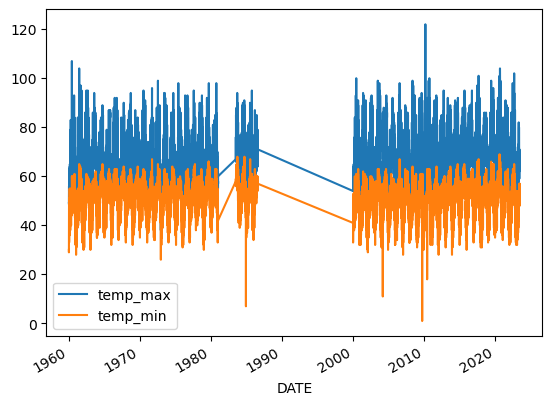

In [41]:
core_weather[["temp_max", "temp_min"]].plot()

In [43]:
core_weather.index.year.value_counts()

DATE
1960    366
1972    366
2016    366
2008    366
2004    366
1984    366
1980    366
1976    366
2020    366
1964    366
1968    366
2012    365
2005    365
2006    365
2007    365
1963    365
2009    365
2010    365
2011    365
1969    365
2003    365
2014    365
2015    365
1962    365
2017    365
2018    365
2019    365
2013    365
2002    365
1970    365
1978    365
1971    365
1973    365
1974    365
1975    365
1967    365
1977    365
1979    365
2001    365
1966    365
2022    365
1965    365
2021    365
1961    365
2000    365
1985    365
1986    212
1983    184
2023    173
Name: count, dtype: int64

<AxesSubplot:xlabel='DATE'>

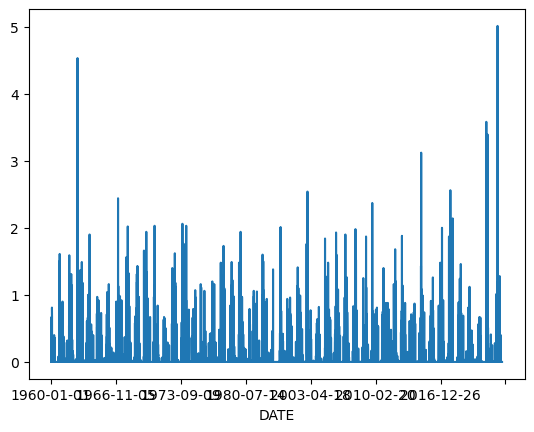

In [27]:
core_weather["precip"].plot()

In [46]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022    15.38
2023    17.79
Name: precip, dtype: float64

# Training ML model

In [47]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [48]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2023-06-18,0.0,68.0,56.0,69.0
2023-06-19,0.0,69.0,54.0,70.0
2023-06-20,0.0,70.0,48.0,67.0


In [49]:
core_weather= core_weather.iloc[:-1,:].copy()

In [50]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2023-06-17,0.0,68.0,57.0,68.0
2023-06-18,0.0,68.0,56.0,69.0
2023-06-19,0.0,69.0,54.0,70.0


In [51]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [52]:
predictors = ["precip", "temp_max", "temp_min"]

In [53]:
train = core_weather.loc[:"2020-12-31"]

In [54]:
test = core_weather.loc[:"2021-01-01":]

In [55]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [56]:
predictions = reg.predict(test[predictors])

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
mean_absolute_error(test["target"],  predictions)

3.455868046361588